In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import CategoricalNB
import matplotlib.pyplot as plt

from utils import preprocessing

In [81]:
# data loading
questions = pd.read_csv('data/question_data.csv', sep=';')
questions = questions.set_index('Unnamed: 0')  # set first column (question number) as index
data = pd.read_parquet('data/train.parquet')

d_questions = preprocessing.top_k_questions(keyword='descriptive', k=20, questions_df=questions, data=data, print_q='False')  # TODO: why does it still print this??

target_feature = data[['q212813'] + d_questions.index.to_list()]
display(target_feature)

selected questions:  ['Do you like watching foreign movies with subtitles?'
 'Which type of wine would you prefer to drink outside of a meal, such as for leisure?'
 'Do you enjoy intense intellectual conversations?'
 'Have you smoked a cigarette in the last 6 months?'
 'How frequently do you drink alcohol?' 'Rate your self-confidence:'
 'How often do you keep your promises?'
 'How often are you open with your feelings?'
 "What's your deal with harder drugs (stuff beyond pot)?"
 'Are you happy with your life?'
 "What's your relationship with marijuana?"
 'If you had to name your greatest motivation in life thus far, what would it be?'
 'How often do you brush your teeth?'
 'How important are your political beliefs to you?'
 'Do you often make jokes that offend more uptight people?'
 'How much influence or control do your parents have over your life?'
 'Do you keep a budget (of your finances)?'
 'Do you space out or daydream a lot?'
 'How do you feel about documentaries?'
 "If you don't 

,q212813,q416235,q85419,q358084,q501,q77,q20930,q29829,q35660,q80,...,q79,q18834,q12970,q212814,q23834,q43261,q20418,q20725,q416236,q442
index,,,,,,,,,,,,,,,,,,,,,
28586,Centrist,Can't answer without a subtitle,"White (such as Chardonnay, Riesling).",Yes,No,Sometimes,Higher than average,Whenever possible,Usually,I never do drugs.,...,I smoke occasionally.,None,Twice or more a day,Somewhat important,Yes,I am my own person.,None,Rarely / never,Yay!,Good
8701,Liberal / Left-wing,Yes,Rosé (such as White Zinfindel).,Yes,No,Very often,Higher than average,Always,Usually,I never do drugs.,...,Never.,Knowledge,Twice or more a day,A little important,No,I consider their opinion but go my own way.,Sometimes,All the time,None,Bad
38781,Liberal / Left-wing,Yes,Rosé (such as White Zinfindel).,Yes,No,Sometimes,Average,Always,Usually,None,...,I smoke occasionally.,Knowledge,Twice or more a day,None,No,I am my own person.,Sometimes,Sometimes,Okay,Bad
31844,Centrist,Yes,"Red (such as Merlot, Cabernet, Shiraz).",Yes,No,Sometimes,Average,Whenever possible,Usually,I never do drugs.,...,"I smoked in the past, but no longer.",Knowledge,Once a day,Somewhat important,No,I consider their opinion but go my own way.,Sometimes,Sometimes,Okay,Bad
39046,Centrist,Can't answer without a subtitle,Rosé (such as White Zinfindel).,Yes,No,Sometimes,Average,Whenever possible,Usually,I never do drugs.,...,I smoke occasionally.,Love,Twice or more a day,Somewhat important,No,I consider their opinion but go my own way.,Yes,Sometimes,Okay,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21184,Other,Can't answer without a subtitle,Rosé (such as White Zinfindel).,Yes,No,Rarely,Average,Always,Always,I never do drugs.,...,Never.,Love,Twice or more a day,Somewhat important,None,I consider their opinion but go my own way.,Yes,Sometimes,None,Bad
67652,Other,Can't answer without a subtitle,"Red (such as Merlot, Cabernet, Shiraz).",Yes,No,Sometimes,Below average,Always,Rarely,I never do drugs.,...,Never.,Knowledge,Once a day,A little important,No,I consider their opinion but go my own way.,Sometimes,Sometimes,Yay!,Good
60546,Liberal / Left-wing,Yes,"Red (such as Merlot, Cabernet, Shiraz).",Yes,No,Sometimes,"Very, very high",Whenever possible,Always,I never do drugs.,...,"I smoked in the past, but no longer.",Love,Twice or more a day,Somewhat important,No,I consider their opinion but go my own way.,Sometimes,Sometimes,Yay!,Good


In [82]:
# preprocessing
target_feature = target_feature.dropna()
target_feature_enc = target_feature.apply(LabelEncoder().fit_transform)
print('shape', target_feature.shape)


shape (17492, 21)


In [83]:
# train test split
X = target_feature_enc.iloc[:, 1:]
y = target_feature_enc.iloc[:,0]
display(X)
display(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print('train set shapes: ', X_train.shape, y_train.shape)
print('test set shapes: ', X_test.shape, y_test.shape)

,q416235,q85419,q358084,q501,q77,q20930,q29829,q35660,q80,q4018,q79,q18834,q12970,q212814,q23834,q43261,q20418,q20725,q416236,q442
index,,,,,,,,,,,,,,,,,,,,
31844,2,1,1,0,2,0,3,3,2,1,2,1,0,2,0,3,1,2,1,0
39046,0,2,1,0,2,0,3,3,2,1,0,2,3,2,0,3,2,2,1,0
21628,0,1,1,1,1,2,3,3,2,1,3,1,3,0,0,3,2,1,1,0
51271,0,1,1,1,2,2,0,3,2,1,0,1,3,2,0,3,2,0,2,1
20492,0,2,1,0,2,2,0,3,2,1,3,2,3,3,0,3,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33094,2,1,1,1,3,3,0,1,3,1,0,1,0,3,1,3,1,2,2,1
59462,0,1,1,0,2,0,3,3,0,1,0,0,0,2,1,2,1,0,2,0
27366,1,2,1,0,2,2,0,3,3,1,2,0,3,1,0,3,2,2,2,0


index
31844    0
39046    0
21628    3
51271    3
20492    0
        ..
33094    2
59462    2
27366    3
67652    3
60546    2
Name: q212813, Length: 17492, dtype: int64

train set shapes:  (11719, 20) (11719,)
test set shapes:  (5773, 20) (5773,)


In [84]:
# mutual info feature selection - we could also use chi-squared
fs = SelectKBest(score_func=mutual_info_classif, k=15)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
display(X_test_fs.shape)

(5773, 15)

In [85]:
# Linear Regression with feature selection
model = LogisticRegression(solver='lbfgs', max_iter=200)
model.fit(X_train_fs, y_train)
# evaluate the model
yhat_test = model.predict(X_test_fs)
yhat_train = model.predict(X_train_fs)
# evaluate predictions
train_accuracy = accuracy_score(y_train, yhat_train)
test_accuracy = accuracy_score(y_test, yhat_test)

print('train accuracy', train_accuracy)
print('test accuracy', test_accuracy)

train accuracy 0.5078078334328867
test accuracy 0.49211848259137364


In [86]:
# Linear Regression without feature selection
model = LogisticRegression(solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)
# evaluate the model
yhat_test = model.predict(X_test)
yhat_train = model.predict(X_train)
# evaluate predictions
train_accuracy = accuracy_score(y_train, yhat_train)
test_accuracy = accuracy_score(y_test, yhat_test)

print('train accuracy', train_accuracy)
print('test accuracy', test_accuracy)

train accuracy 0.5127570611826948
test accuracy 0.4962757664992205


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
# Naive Bayes
clf = CategoricalNB()
clf.fit(X_train, y_train)
yhat_train = clf.predict(X_train)
yhat_trainest = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, yhat_train)
test_accuracy = accuracy_score(y_test, yhat_test)
print('train accuracy', train_accuracy)
print('test accuracy', test_accuracy)

train accuracy 0.5200102397815514
test accuracy 0.4962757664992205


# Visualization

Feature Do you like watching foreign movies with subtitles?: 0.017734
Feature Which type of wine would you prefer to drink outside of a meal, such as for leisure?: 0.007335
Feature Do you enjoy intense intellectual conversations?: 0.007130
Feature Have you smoked a cigarette in the last 6 months?: 0.000000
Feature How frequently do you drink alcohol?: 0.002285
Feature Rate your self-confidence:: 0.007713
Feature How often do you keep your promises?: 0.011735
Feature How often are you open with your feelings?: 0.000000
Feature What's your deal with harder drugs (stuff beyond pot)?: 0.019483
Feature Are you happy with your life?: 0.000000
Feature What's your relationship with marijuana?: 0.013522
Feature If you had to name your greatest motivation in life thus far, what would it be?: 0.017610
Feature How often do you brush your teeth?: 0.008652
Feature How important are your political beliefs to you?: 0.089992
Feature Do you often make jokes that offend more uptight people?: 0.004910
Fea

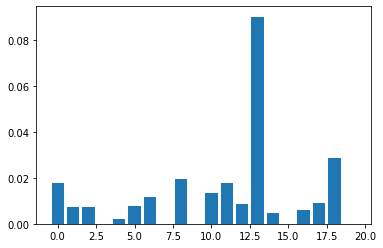

In [88]:
for i, score in enumerate(fs.scores_):
 print(f'Feature {d_questions.iloc[i,0]}: %f' % (score))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()